# Dependents
***

In [1]:
import requests as req
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from requests.exceptions import HTTPError

# Loading the data from CSV file
***

In [2]:
city_data = 'citycountry_latlon.csv'
city_data_df = pd.read_csv(city_data, encoding = 'ISO-8859-1')

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Creating a dataframe to store or process the data
# The issue is that citipy or the raw data contain far more records than the openweather database
# (3100000 vs 200000 cities) so some work is needed to find a suitable list of cities.
# I elected to divide the dataset into 4 groups.  This will ensure full coverage across the dataset.
city_data_df = city_data_df[['Country', 'City', 'Latitude']]
city_data_upper45_df = city_data_df[city_data_df['Latitude'] > 45]
city_data_ubt045_df = city_data_df[city_data_df['Latitude'] <= 45]
city_data_ubt045_df = city_data_ubt045_df[city_data_ubt045_df['Latitude'] > 0]
city_data_lbt045_df = city_data_df[city_data_df['Latitude'] < 0]
city_data_lbt045_df = city_data_lbt045_df[city_data_lbt045_df['Latitude'] >= -45]
city_data_lower45_df = city_data_df[city_data_df['Latitude'] < -45]

In [4]:
# Building a dataframe to store the results of the URL requests
city_data_df["temp_min"] = ""
city_data_df["temp_max"] = ""
city_data_df['humid'] = ''
city_data_df['wind_speed'] = ''
city_data_df['cloud'] = ''
city_data_df['found_city'] = ''
city_data_df['url'] = ''
city_does_not_exist = []

In [5]:
len(city_data_df[city_data_df['found_city'] != ''])

0

# Making the URL request and storing the response
***

In [6]:
# using the URL from openweather to look at current weather information
# I considered looking at historical info but there were limitations on data availability
url = 'http://api.openweathermap.org/data/2.5/weather?q='
api_key = '2e0b3995de13957a2e62c46a5a3da34b'
mode = '&mode=json'
units = 'imperial'

In [7]:
# Greater than 45 degrees latitude
while len(city_data_df[city_data_df['found_city'] != '']) < 100:
    test_cities_data_df = city_data_upper45_df.sample(125)
    time.sleep(15)
    for index, row in test_cities_data_df.iterrows():
        target_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key + '&units=' + units
        try:
            r = req.get(target_url)
            r.raise_for_status()
        except HTTPError:
            city_does_not_exist.append(r.url)
        else:
            hold_data = req.get(target_url).json()
            city_data_df.set_value(index, "found_city", row['City'])
            city_data_df.set_value(index, "temp_min", hold_data["main"]["temp_min"])
            city_data_df.set_value(index, "temp_max", hold_data["main"]["temp_max"])
            city_data_df.set_value(index, "humid", hold_data["main"]["humidity"])
            city_data_df.set_value(index, "wind_speed", hold_data["wind"]["speed"])
            city_data_df.set_value(index, "cloud", hold_data["clouds"]["all"])
            city_data_df.set_value(index, "url", target_url)

In [8]:
len(city_data_df[city_data_df['found_city'] != ''])

146

In [9]:
# Between 0 and 45 degrees latitude
while len(city_data_df[city_data_df['found_city'] != '']) < 250:
    test_cities_data_df = city_data_ubt045_df.sample(125)
    time.sleep(15)
    for index, row in test_cities_data_df.iterrows():
        target_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key + '&units=' + units
        try:
            r = req.get(target_url)
            r.raise_for_status()
        except HTTPError:
            city_does_not_exist.append(r.url)
        else:
            hold_data = req.get(target_url).json()
            city_data_df.set_value(index, "found_city", row['City'])
            city_data_df.set_value(index, "temp_min", hold_data["main"]["temp_min"])
            city_data_df.set_value(index, "temp_max", hold_data["main"]["temp_max"])
            city_data_df.set_value(index, "humid", hold_data["main"]["humidity"])
            city_data_df.set_value(index, "wind_speed", hold_data["wind"]["speed"])
            city_data_df.set_value(index, "cloud", hold_data["clouds"]["all"])
            city_data_df.set_value(index, "url", target_url)

In [10]:
len(city_data_df[city_data_df['found_city'] != ''])

304

In [11]:
# Between 0 and -45 degrees latitude
while len(city_data_df[city_data_df['found_city'] != '']) < 400:
    test_cities_data_df = city_data_lbt045_df.sample(125)
    time.sleep(15)
    for index, row in test_cities_data_df.iterrows():
        target_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key + '&units=' + units
        try:
            r = req.get(target_url)
            r.raise_for_status()
        except HTTPError:
            city_does_not_exist.append(r.url)
        else:
            hold_data = req.get(target_url).json()
            city_data_df.set_value(index, "found_city", row['City'])
            city_data_df.set_value(index, "temp_min", hold_data["main"]["temp_min"])
            city_data_df.set_value(index, "temp_max", hold_data["main"]["temp_max"])
            city_data_df.set_value(index, "humid", hold_data["main"]["humidity"])
            city_data_df.set_value(index, "wind_speed", hold_data["wind"]["speed"])
            city_data_df.set_value(index, "cloud", hold_data["clouds"]["all"])
            city_data_df.set_value(index, "url", target_url)

In [12]:
len(city_data_df[city_data_df['found_city'] != ''])

413

In [13]:
# Less than -45 degrees latitudes
while len(city_data_df[city_data_df['found_city'] != '']) < 500:
    test_cities_data_df = city_data_lower45_df.sample(200)
    time.sleep(15)
    for index, row in test_cities_data_df.iterrows():
        target_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key + '&units=' + units
        try:
            r = req.get(target_url)
            r.raise_for_status()
        except HTTPError:
            city_does_not_exist.append(r.url)
        else:
            hold_data = req.get(target_url).json()
            city_data_df.set_value(index, "found_city", row['City'])
            city_data_df.set_value(index, "temp_min", hold_data["main"]["temp_min"])
            city_data_df.set_value(index, "temp_max", hold_data["main"]["temp_max"])
            city_data_df.set_value(index, "humid", hold_data["main"]["humidity"])
            city_data_df.set_value(index, "wind_speed", hold_data["wind"]["speed"])
            city_data_df.set_value(index, "cloud", hold_data["clouds"]["all"])
            city_data_df.set_value(index, "url", target_url)

In [14]:
city_data_df[city_data_df['found_city'] != ''].to_csv('Weather_API_output.csv')

In [15]:
plot_data_df = city_data_df[city_data_df['found_city'] != '']
len(plot_data_df)

519

In [16]:
# Creating bins to segment the data and to plot the averages vs. latitude
lat_bins = [-60,-40,-20,0,20,40,60]
group_names = ['40Below', '20Below', '0Below', '0Above', '20Above', '40Above']
plot_data_df['lat_cat'] = pd.cut(plot_data_df['Latitude'], bins=lat_bins, labels=group_names)
plot_data_df.head()

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country,City,Latitude,temp_min,temp_max,humid,wind_speed,cloud,found_city,url,lat_cat
61107,af,qal`ah-ye sang-e takht,34.259067,18.7,18.7,76,2.04,64,qal`ah-ye sang-e takht,http://api.openweathermap.org/data/2.5/weather...,20Above
86964,af,wurjani,32.428812,25.77,25.77,74,2.04,0,wurjani,http://api.openweathermap.org/data/2.5/weather...,20Above
127447,ar,aguada grande,-47.389004,85.98,85.98,61,4.38,24,aguada grande,http://api.openweathermap.org/data/2.5/weather...,40Below
127650,ar,alto rio senguer,-45.041049,50.43,50.43,40,26.75,0,alto rio senguer,http://api.openweathermap.org/data/2.5/weather...,40Below
127772,ar,antonio pini,-29.075481,95.16,95.16,66,8.41,0,antonio pini,http://api.openweathermap.org/data/2.5/weather...,20Below


# Plotting the data
***

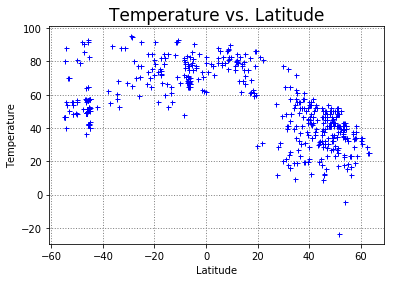

In [17]:
# Plot of temperature vs. Latitude
x = plot_data_df['Latitude']
y = plot_data_df['temp_max']
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.1, linestyle='None')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Temperature", size=10)
plt.xlabel("Latitude", size=10)
plt.title('Temperature vs. Latitude', size=17)
plt.show()

In [18]:
# floats and strings are tough to work with. Need to change those to integers
plot_data_df.dtypes

Country         object
City            object
Latitude       float64
temp_min        object
temp_max        object
humid           object
wind_speed      object
cloud           object
found_city      object
url             object
lat_cat       category
dtype: object

In [19]:
# Changing the columns to be numeric so that we can do some basic stats
plot_data_df = plot_data_df.astype({'Latitude':int})
plot_data_df = plot_data_df.astype({'temp_max':int})
plot_data_df = plot_data_df.astype({'wind_speed':int})
plot_data_df.dtypes

Country         object
City            object
Latitude         int64
temp_min        object
temp_max         int64
humid           object
wind_speed       int64
cloud           object
found_city      object
url             object
lat_cat       category
dtype: object

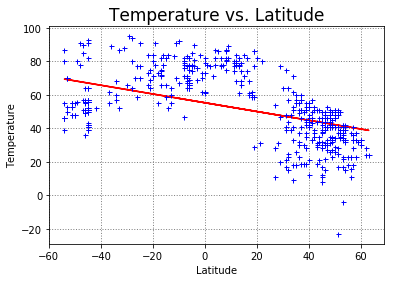

In [20]:
# Replotting the latitude vs. temperature plot and adding a regression line that shows the relationship between the 
# variables.  Notice that the southern hempishere summer is happening now while the northern hemisphere is happening
# now
x = plot_data_df['Latitude']
y = plot_data_df['temp_max']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.1, linestyle='None', label='raw data')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Temperature", size=10)
plt.xlabel("Latitude", size=10)
plt.title('Temperature vs. Latitude', size=17)
plt.show()

In [21]:
# Printing the line equation
print("The regression line equation is:", "y=",slope,"*x + ", intercept)

The regression line equation is: y= -0.261642622064 *x +  55.3002805557


In [22]:
# Print the p-value
print("p-value:", p_value, "and", "std error:", std_err)

p-value: 2.44362584843e-34 and std error: 0.0198748764211


In [23]:
# Showing the correlation between temp and latitude
print("r-squared:", r_value**2)

r-squared: 0.251054402151


In [24]:
group_analysis_df = plot_data_df
group_analysis_df.head()

,Country,City,Latitude,temp_min,temp_max,humid,wind_speed,cloud,found_city,url,lat_cat
61107,af,qal`ah-ye sang-e takht,34,18.7,18,76,2,64,qal`ah-ye sang-e takht,http://api.openweathermap.org/data/2.5/weather...,20Above
86964,af,wurjani,32,25.77,25,74,2,0,wurjani,http://api.openweathermap.org/data/2.5/weather...,20Above
127447,ar,aguada grande,-47,85.98,85,61,4,24,aguada grande,http://api.openweathermap.org/data/2.5/weather...,40Below
127650,ar,alto rio senguer,-45,50.43,50,40,26,0,alto rio senguer,http://api.openweathermap.org/data/2.5/weather...,40Below
127772,ar,antonio pini,-29,95.16,95,66,8,0,antonio pini,http://api.openweathermap.org/data/2.5/weather...,20Below


In [25]:
group_analysis_df = group_analysis_df[['lat_cat', 'temp_max']]
group_analysis_df = pd.DataFrame(group_analysis_df)
group_analysis_df = group_analysis_df.astype({'temp_max':int})
plot_group_means = group_analysis_df.groupby('lat_cat').mean()
plot_group_means

,temp_max
lat_cat,
40Below,54.149533
20Below,73.344828
0Below,72.797468
0Above,75.433962
20Above,42.739130
40Above,37.045455


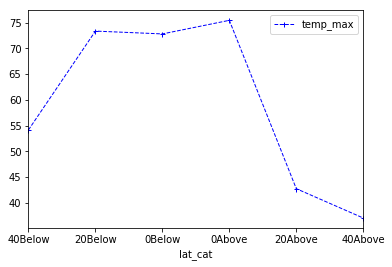

In [26]:
plot_group_means.plot(subplots=False, marker='+', color='blue', markersize=5, linewidth=1, linestyle='--', label='data')
plt.show()

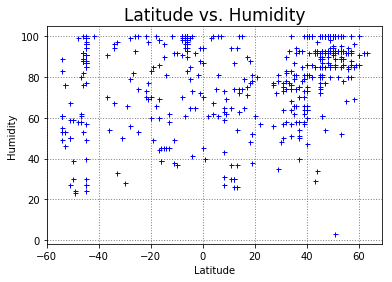

In [27]:
x = plot_data_df['Latitude']
y = plot_data_df['humid']
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.1, linestyle='None')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Humidity", size=10)
plt.xlabel("Latitude", size=10)
plt.title('Latitude vs. Humidity', size=17)
plt.show()

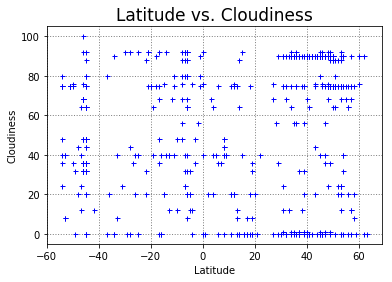

In [28]:
x = plot_data_df['Latitude']
y = plot_data_df['cloud']
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.1, linestyle='None')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Cloudiness", size=10)
plt.xlabel("Latitude", size=10)
plt.title('Latitude vs. Cloudiness', size=17)
plt.show()

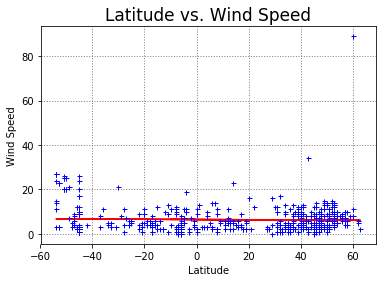

In [29]:
x = plot_data_df['Latitude']
y = plot_data_df['wind_speed']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.1, linestyle='None')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Wind Speed", size=10)
plt.xlabel("Latitude", size=10)
plt.title('Latitude vs. Wind Speed', size=17)
plt.show()

In [30]:
print("The regression line equation is:", "y=",slope,"*x + ", intercept)

The regression line equation is: y= -0.00555915470998 *x +  6.48271720582


In [31]:
# Print the p-value
print("p-value:", p_value, "and", "std error:", std_err)

p-value: 0.453849407269 and std error: 0.00741637207843


In [32]:
print("r-squared:", r_value**2)

r-squared: 0.00108560598462


# Observations
***

A bell shape would be expected if the average temps were plotted against latitude.  In other words temps would be extremely high or low on the outer latitudes (signifying summer and winter...it's winter in the northern hemisphere while it's summer in the souther hemisphere).  Moving closer to the equator would mean that temps soar - creating the peak of the bell curve.  That's effectively what we see in the plot - grouped latitudes vs. avg temps.

Plotting a regression line helps show visually the inverse relationship between the northern and southern hemispheres. The negative slope suggests that moving from the south to the north means moving from hot or warmer weather to colder temperatures.

The temperature vs. latitude data was most convincing in explaining the relationship between temperature and latitude. Attempts to get historical data were not successful. Trade winds might help in telling some of the story as well. I could not see any obvious trends in the data but research suggests that are certain times of the year the winds pick up dramatically between -20 to 20 degress latitude.